### Mini Project - Logisitc Regression on MNIST dataset  
1- Mhd Eyad Abou Ker 40208070  
2-   
3-  


### Import All Dependencies

In [1]:
import numpy as np
from torchvision import datasets, transforms
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

### Dowloand and Split Data

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load training data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset.data = train_dataset.data.numpy()
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_dataset.data = test_dataset.data.numpy()
print(train_dataset.data.shape)  
print(test_dataset.data.shape)

(60000, 28, 28)
(10000, 28, 28)


### Show some samples

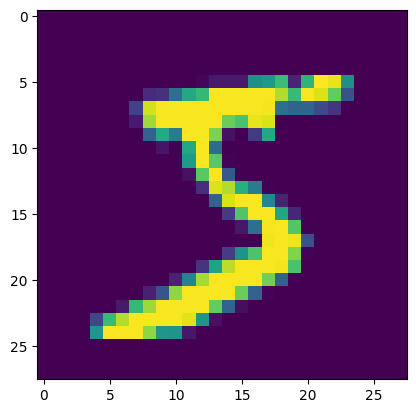

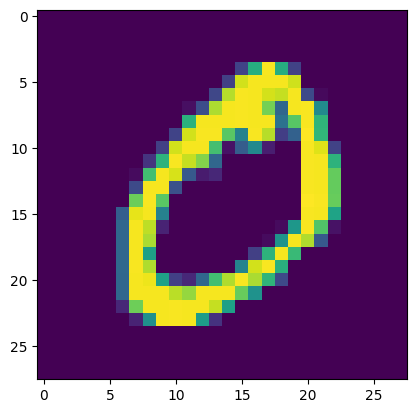

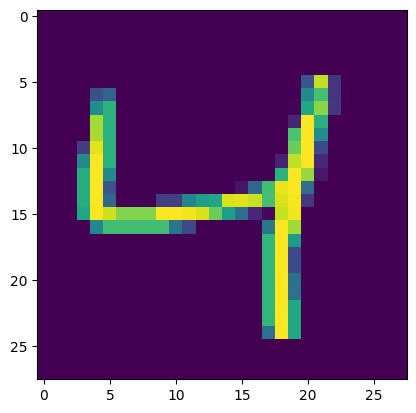

In [3]:
for i in range(3):
    plt.imshow(train_dataset.data[i].reshape(28, 28))  
    plt.show()


### Split, Normalize and train on Data using LogisticRegression from SkLearn then check accuracy

In [4]:
# Slpit data into x_train, y_train, x_test, y_test
x_train = train_dataset.data.reshape(len(train_dataset), -1)
x_test  = test_dataset.data.reshape(len(test_dataset), -1)

#Normalize the data
x_train = x_train / 255.0
x_test  = x_test  / 255.0
y_train = train_dataset.targets.numpy()
y_test  = test_dataset.targets.numpy()

#define the model and fit the data
lrmodel = LogisticRegression(solver='saga',max_iter=1000)
lrmodel.fit(x_train, y_train)


#accuracy of the model
print("Train accuracy:", lrmodel.score(x_train, y_train))
print("Test  accuracy:", lrmodel.score(x_test,  y_test))







Train accuracy: 0.9392833333333334
Test  accuracy: 0.9257


### perdict all samples   



In [14]:
#predict the test data
y_pred = lrmodel.predict(x_test)
print('predictions:',y_pred[:10])
print('actual:     ',y_test[:10])


predictions: [7 2 1 0 4 1 4 9 6 9]
actual:      [7 2 1 0 4 1 4 9 5 9]


#### Perdict 1 sample

In [19]:
#predict the test data
sample_index = 998
y_pred_1sample = lrmodel.predict(x_test[sample_index].reshape(1, -1))
print('predictions:',y_pred_1sample)
print('actual:      ',y_test[sample_index])


predictions: [8]
actual:       8


### Classificaion Report

In [20]:
#classification report
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



### confusion matrix


In [21]:
#confusion matrix
print(confusion_matrix(y_test, y_pred)) #Note: that most of the predictions are correct, but some are incorrect. hence the diagonal dominance in the confusion matrix.

[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]
